In [1]:
import ugradio
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as pf
import lolfunctions
from astropy import units as u
import glob
import doppler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def peak_finder(signal_array, thresh):
    threshold = thresh*(999./1000)
    peaks = []                                                    
    for i in range(2,len(signal_array)-2): 
        if signal_array[i] > signal_array[i+1] and signal_array[i] > signal_array[i-1] and signal_array[i] > signal_array[i-2] and signal_array[i] > signal_array[i+2]:  
            if signal_array[i] > threshold: # or could do ==threshhold and set thresh = .max()                    
                peaks.append(i)
    return peaks

In [3]:
def func(filename):
    lolavgs = np.array([])
    for i in np.arange(len(filename)):
        files_getdata = pf.getdata(filename[i])
        files_headers = pf.getheader(filename[i])
        files_open = pf.open(filename[i])
        
        nspec = files_headers['NSPEC']
        res = files_headers['RES']
        nchan = files_headers['NCHAN']
        
        avgs = np.zeros(len(files_getdata))
        for j in np.arange(nspec):
            specs = (files_open[j+1].data['auto1_real'])**2 + (files_open[j+1].data['auto0_real'])**2
            avgs = avgs + specs

        avgs = avgs/nspec
        meanavgs = avgs - np.mean(avgs)
        cutavgs = meanavgs[2500:-3500]
        if i == 0:
            lolavgs = np.append(lolavgs, cutavgs)
        else:
            lolavgs = np.vstack((lolavgs, cutavgs))
            
    return lolavgs

In [4]:
files635 = glob.glob('420_data_3/LO_635*.fits')
files636 = glob.glob('420_data_3/LO_636*.fits')

In [6]:
header635 = pf.getheader(files635[0])

In [14]:
avgs635 = np.loadtxt('avgs635_2')
avgs636 = np.loadtxt('avgs636_2')

In [30]:
peaks = np.array([])
spectras635 =np.array([])
for i in np.arange(len(avgs635)):
    i = int(i)
    files_headers = pf.getheader(files635[i])

    nspec = files_headers['NSPEC']
    res = files_headers['RES']
    nchan = files_headers['NCHAN']

    cv635 = lolfunctions.airPLS(avgs635[i], lambda_= 50)[1200:,]
    cv636 = lolfunctions.airPLS(avgs636[i], lambda_= 50)[1200:,]
    
    flatavgs635 = avgs635[i][1200:,] - cv635
    flatavgs636 = avgs636[i][1200:,] - cv636
    
    sub = flatavgs635 - flatavgs636
    

    newsub = np.array([])
    for j in range(len(sub)):
        if j < 400 and sub[j] == max(sub[0:400]):
            newsub = np.append(newsub, 0)
        else:
            newsub = np.append(newsub, sub[j])
            

    newsub2 = np.array([])   
    for k in range(len(newsub)):
        if k < 400 and newsub[k] == max(newsub[0:400]):
            newsub2 = np.append(newsub2, 0)
        else:
            newsub2 = np.append(newsub2, newsub[k])
    
    if i == 0:
        spectras635 = np.append(spectras635, newsub2)
    else:
        spectras635 = np.vstack((spectras635, newsub2))
    
    LO = 635
    freqs = (np.arange(nchan) * res*u.Hz + 2 * LO * u.MHz + 144 * u.MHz).to(u.MHz).value[2500:-3500]
    
    fpeaks = peak_finder(newsub2, max(newsub2))
    
    cents = np.array([])
    for g in fpeaks:
        cents = np.append(cents, lolfunctions.centroid(freqs[1200:,][g-1:g+1],newsub2[g-1:g+1]))
        
    cents = np.mean(cents)
    print(i,cents)
    peaks = np.append(peaks,cents)
#     plt.figure(figsize=(8,5))
#     plt.plot(freqs[1200:,], newsub2)
#     plt.axvline(cents)
#     plt.title(i, fontsize=17)
#     plt.xlabel('Frequency [MHZ]', fontsize=17)
#     plt.ylabel('Power', fontsize=17)
#     plt.grid(True)
#     plt.show()

(0, 1420.2865565299601)
(1, 1420.2791266485917)
(2, 1420.2834918169453)
(3, 1420.2777121164215)
(4, 1420.2761550558685)
(5, 1420.2571441838147)
(6, 1420.251244943853)
(7, 1420.2512253864115)
(8, 1420.2441220525941)
(9, 1420.2396277291323)
(10, 1420.2411230108676)
(11, 1420.2397044119564)
(12, 1420.2221708845755)
(13, 1420.2117767293578)
(14, 1420.189840677237)
(15, 1420.1839877353789)
(16, 1420.1942070923951)
(17, 1420.208932916612)
(18, 1420.1869789254183)
(19, 1420.2044383560285)
(20, 1420.2015577618638)
(21, 1420.191199155855)
(22, 1420.232372547214)
(23, 1420.220603002409)
(24, 1420.1842230011939)
(25, 1420.2367370420523)
(26, 1420.2366696103265)
(27, 1420.2396161408037)
(28, 1420.251483097175)
(29, 1420.2441950356829)
(30, 1420.2571935276908)
(31, 1420.2617065122449)
(32, 1420.264503780495)
(33, 1420.2821384762767)
(34, 1420.286506154009)
(35, 1420.2893869141317)
(36, 1420.2864192846616)
(37, 1420.3012931656629)
(38, 1420.3001864990465)
(39, 1420.3070738131366)
(40, 1420.315911150

(321, 1420.5399721638755)
(322, 1420.5165013012429)
(323, 1420.5121837299148)
(324, 1420.538567062875)
(325, 1420.5120383127319)
(326, 1420.5105334932111)
(327, 1420.5061246105054)
(328, 1420.4944512926479)
(329, 1420.4916229270796)
(330, 1420.487219979919)
(331, 1420.4812224820014)
(332, 1420.472416627927)
(333, 1420.4593642094333)
(334, 1420.4578804670882)
(335, 1420.4609523159691)
(336, 1420.4667032280308)
(337, 1420.4578450225088)
(338, 1420.4418301641394)
(339, 1420.4403601253393)
(340, 1420.4446471157)
(341, 1420.4388721131836)
(342, 1420.4316552093264)
(343, 1420.4257424908906)
(344, 1420.4096966061029)
(345, 1420.3977471204209)
(346, 1420.3949681169966)
(347, 1420.3789665726506)
(348, 1420.3774301508713)
(349, 1420.369922474933)
(350, 1420.3596879362965)
(351, 1420.3597066272916)
(352, 1420.3509757500171)
(353, 1420.3525871266299)
(354, 1420.3554550679303)
(355, 1420.3627259053112)
(356, 1420.3233881262295)
(357, 1420.3269136523766)
(358, 1420.3289313043231)
(359, 1420.33662380

(640, 1420.3760022812282)
(641, 1420.3908491554371)
(642, 1420.3513686129052)
(643, 1420.8434753419685)
(644, 1420.3484063290259)
(645, 1420.3275824761272)
(646, 1420.3231392991436)
(647, 1420.311393157072)
(648, 1420.3172595366823)
(649, 1420.6257179374009)
(650, 1420.6060016208894)
(651, 1420.3995557218652)
(652, 1420.7221011976474)
(653, 1419.750775036131)
(654, 1420.3029077838567)
(655, 1420.744341781427)
(656, 1420.4772901245117)
(657, 1420.4712172223881)
(658, 1420.8190013100136)
(659, 1420.4817911208718)
(660, 1420.3030386959292)
(661, 1420.6018163742101)
(662, 1420.4847940831914)
(663, 1420.3172475338602)
(664, 1420.308631446228)
(665, 1419.4883975099085)
(666, 1419.8785445683477)
(667, 1419.8592278989545)
(668, 1420.31928629049)
(669, 1420.3174612311689)
(670, 1420.6951381810545)
(671, 1420.3480058860171)
(672, 1420.367116300813)
(673, 1420.3703505526762)
(674, 1420.3627867315283)
(675, 1420.4685573042927)
(676, 1420.3655502886679)
(677, 1420.399613222665)
(678, 1420.397737397

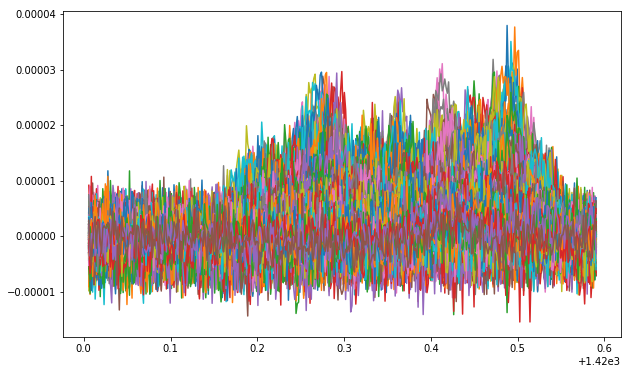

In [23]:
plt.figure(figsize=(10,6))
for i in np.arange(len(spectras635)):
    plt.plot(freqs[1200:,][400:800], spectras635[i][400:800])
plt.show()

In [24]:
gal_l = np.array([])
gal_b = np.array([])
RAs = np.array([])
DECs = np.array([])
JD = np.array([])
for i in np.arange(int(len(files635))):
    head = pf.getheader(files635[i])
    glon = head['L']
    glat = head['B']
    gal_l = np.append(gal_l,glon)
    gal_b = np.append(gal_b,glat)
    ra = head['RA']
    dec = head['DEC']
    RAs = np.append(RAs,ra)
    DECs = np.append(DECs,dec)
    jd = head['JD']
    JD = np.append(JD,jd)

In [31]:
v_corrected = []
for i in range(int(len(JD))):
    vel = doppler.get_projected_velocity(RAs[i],DECs[i],JD[i],obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.)
    v_corrected.append(float(vel/1000))
    
f0 = 1420.4
c = 3e5 #km/s
df = peaks - f0
v = -(df/f0)*c


In [34]:
print(peaks[0])
print(v[0])

1420.28655653
23.9601809434


In [37]:
actual_v1 = v - v_corrected

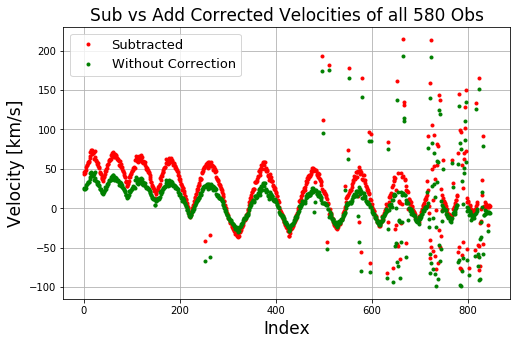

In [38]:
plt.figure(figsize=(8,5))
plt.plot(actual_v1,'r.')
plt.plot(v,'g.')
plt.legend(['Subtracted','Without Correction'],fontsize=13)
plt.ylabel('Velocity [km/s]',fontsize=17)
plt.xlabel('Index',fontsize=17)
plt.title('Sub vs Add Corrected Velocities of all 580 Obs',fontsize=17)
plt.grid(True)
plt.show()

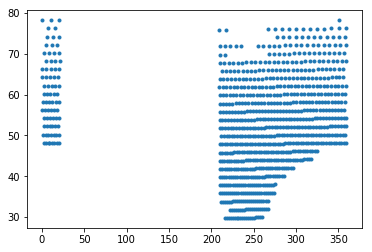

In [41]:
plt.plot(gal_l,gal_b, '.')
